<a href="https://colab.research.google.com/github/Hoodup/Facial_Regcognition_System/blob/main/WALMART_Weekly_Sales_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Walmart.csv')

In [ ]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
df.drop(columns=['Date'], inplace=True)

In [ ]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  Year  Month  
0         8.106  2010      2  
1         8.106  2010      2  
2         8.106  2010      2  
3         8.106  2010      2  
4         8.106  2010      3

In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
Profile = ProfileReport(df, title = 'Walmart')
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 35.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6401.000000  6.401000e+03   6401.000000  6401.000000  6401.000000   
mean     23.054210  1.036130e+06      0.068895    60.772042     3.359634   
std      12.991284  5.451961e+05      0.253296    18.417068     0.459696   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.517431e+05      0.000000    47.660000     2.933000   
50%      23.000000  9.572983e+05      0.000000    62.860000     3.452000   
75%      34.000000  1.414565e+06      0.000000    75.000000     3.737000   
max      45.000000  2.685352e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         Year        Month  
count  6401.000000   6401.000000  6401.000000  6401.000000  
mean    171.642219      8.002298  2010.967974     6.419466  
std      39.359852      1.878705     0.797304     3.223661  
min     126.064000      3.879000  2010.000000     1.000000  
25%     131.784000      6.891000  2010.000000     4.000000  
50%     182.658578      7.874000  2011.000000     6.000000  
75%     212.833640      8.622000  2012.000000     9.000000  
max     227.232807     14.313000  2012.000000    12.000000

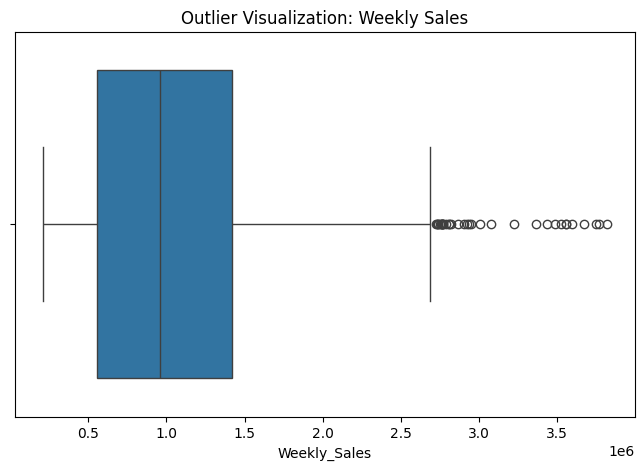

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weekly_Sales'])
plt.title('Outlier Visualization: Weekly Sales')
plt.show()


In [ ]:
# Outlier handling using IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Removing outliers
df = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]

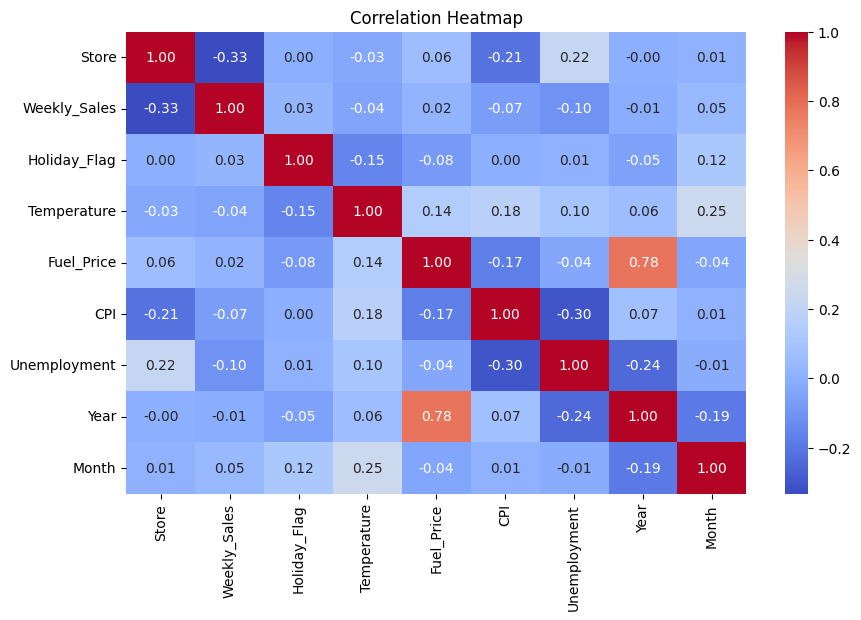

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

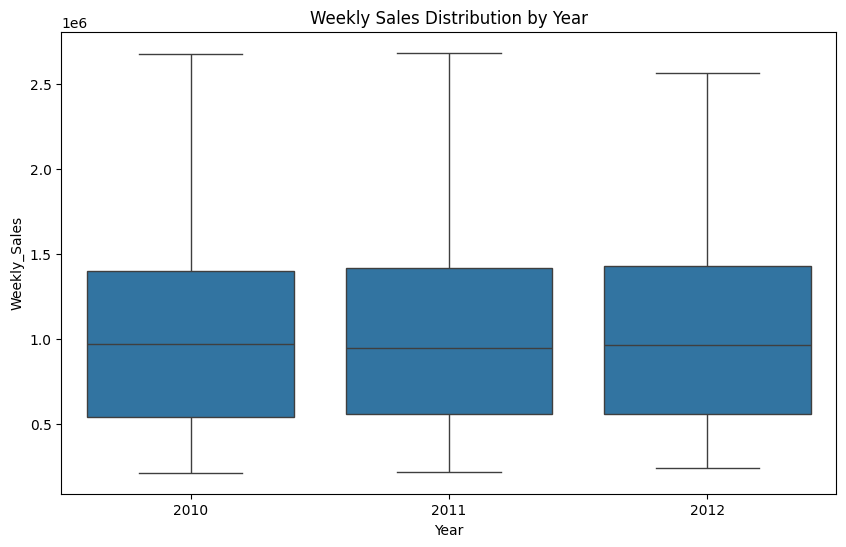

In [ ]:
# Visualization: Weekly Sales by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution by Year')
plt.show()

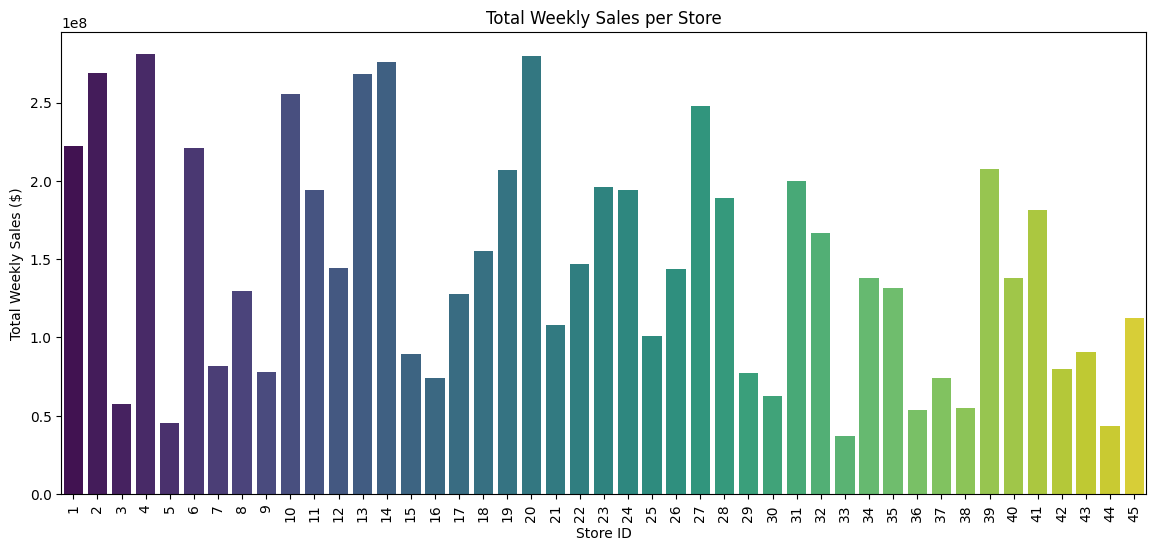

In [ ]:
# SALES DISTRIBUTION ACROSS STORES

# Group sales by store and sum them up
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()

# Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')

# Labels and title
plt.xlabel('Store ID')
plt.ylabel('Total Weekly Sales ($)')
plt.title('Total Weekly Sales per Store')
plt.xticks(rotation=90)  # Rotate store labels for readability
plt.show()


# **Insight:** Some stores contribute significantly more to total sales than others.


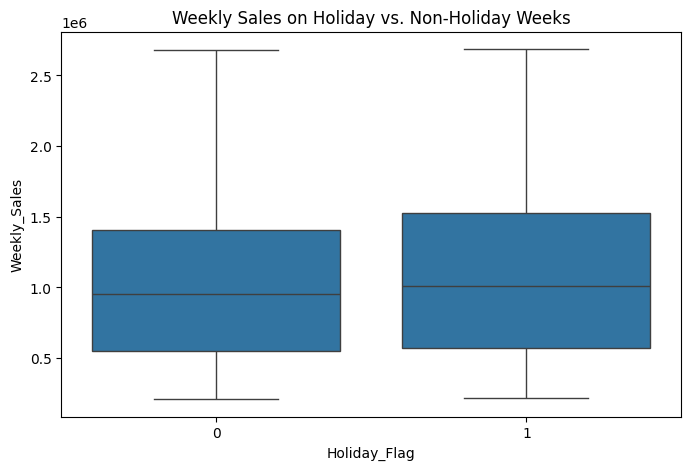

In [ ]:
# Visualization: Impact of Holiday on Sales
plt.figure(figsize=(8, 5))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales on Holiday vs. Non-Holiday Weeks')
plt.show()

# **Insight:** Sales increase significantly during holiday weeks.

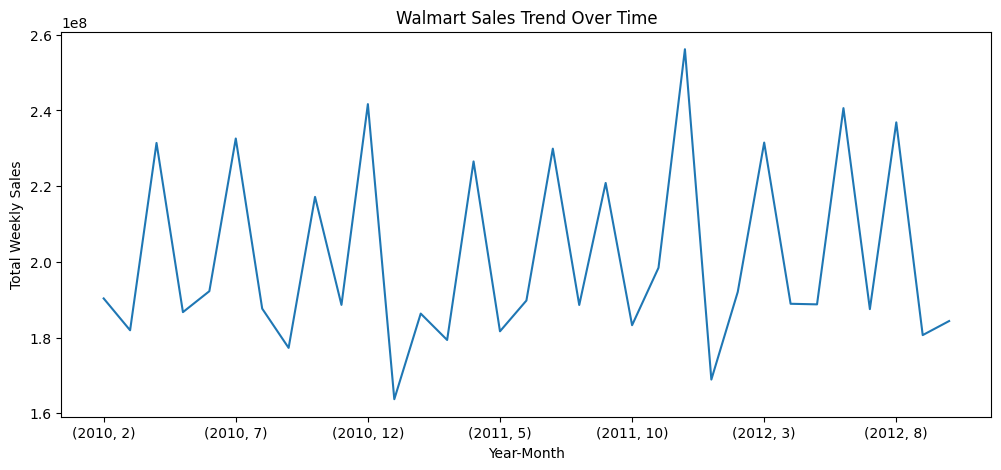

In [ ]:
# Time-Series Sales Trend

df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().plot(figsize=(12, 5))
plt.xlabel('Year-Month')
plt.ylabel('Total Weekly Sales')
plt.title('Walmart Sales Trend Over Time')
plt.show()

# **Insight:** Seasonal spikes occur around major holidays.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month']]
y = df['Weekly_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print("Random Forest Regressor Performance:")
print(f'MAE: {mae_rf:.2f}')
print(f'MSE: {mse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')

Random Forest Regressor Performance:
MAE: 68293.09
MSE: 15405385098.79
R-squared: 0.95


In [ ]:
# Training Score vs Test Score

print("Train Score vs Test Score")

train_score = rf_model.score(X_train, y_train)
print(f"Train Score: {train_score:.2f}")

test_score = rf_model.score(X_test, y_test)
print(f"Test Score: {test_score:.2f}")

Train Score vs Test Score
Train Score: 0.99
Test Score: 0.95


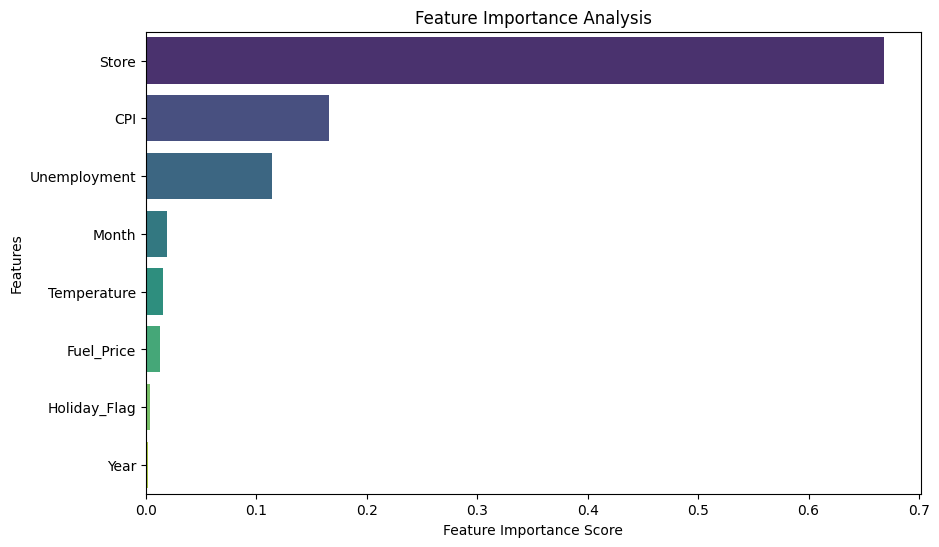

In [ ]:
# Assuming X_train and y_train are already defined
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()
